# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
# Preprocessing
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])
df['wants_extra_baggage'] = df['wants_extra_baggage'].astype(int)
df['wants_preferred_seat'] = df['wants_preferred_seat'].astype(int)
df['wants_in_flight_meals'] = df['wants_in_flight_meals'].astype(int)


In [9]:
# Features and target
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [10]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Print the correlation with the target variable 'booking_complete'
print(correlation_matrix['booking_complete'].sort_values(ascending=False))

booking_complete              1.000000
booking_origin_Malaysia       0.223166
route_PENTPE                  0.109430
booking_origin_Indonesia      0.068813
wants_extra_baggage           0.068139
                                ...   
length_of_stay               -0.042408
booking_origin_South Korea   -0.042828
route_ICNSYD                 -0.047394
flight_duration              -0.106266
booking_origin_Australia     -0.207460
Name: booking_complete, Length: 924, dtype: float64


In [11]:
import seaborn as sns

In [12]:

'''
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()'''

"\n# Create a heatmap of the correlation matrix\nplt.figure(figsize=(12, 10))\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Correlation Matrix')\nplt.show()"

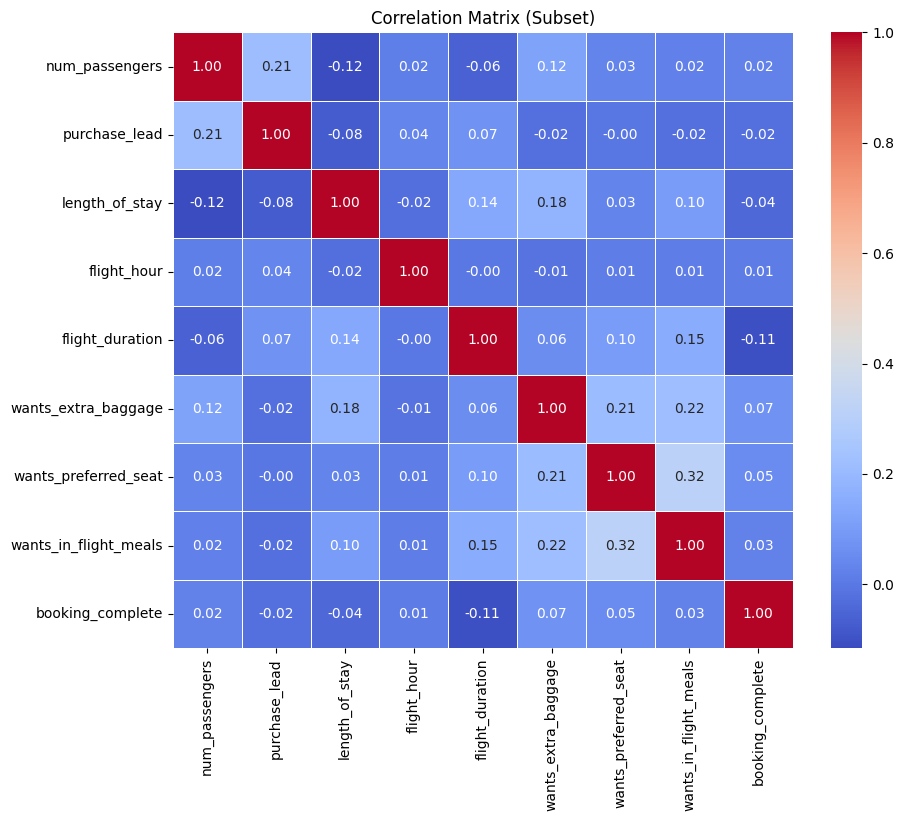

In [13]:
import matplotlib.pyplot as plt

# Select relevant features for a subset
features_of_interest = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration',
                         'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
subset_df = df[features_of_interest]

# Calculate correlation matrix for the subset
correlation_matrix_subset = subset_df.corr()

# Create a heatmap for the subset
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Subset)')
plt.show()


In [14]:
correlation_with_target = correlation_matrix['booking_complete'].sort_values(ascending=False)
print(correlation_with_target)

booking_complete              1.000000
booking_origin_Malaysia       0.223166
route_PENTPE                  0.109430
booking_origin_Indonesia      0.068813
wants_extra_baggage           0.068139
                                ...   
length_of_stay               -0.042408
booking_origin_South Korea   -0.042828
route_ICNSYD                 -0.047394
flight_duration              -0.106266
booking_origin_Australia     -0.207460
Name: booking_complete, Length: 924, dtype: float64


In [18]:
# Select features with high correlation to the target variable
selected_features = correlation_with_target[abs(correlation_with_target) > 0.15].index.tolist()
selected_features.remove('booking_complete')
print("Selected Features:", selected_features)

Selected Features: ['booking_origin_Malaysia', 'booking_origin_Australia']


## Random Forest

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
feature_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
                'flight_duration', 'wants_extra_baggage', 'wants_preferred_seat',
                'wants_in_flight_meals']
target_col = 'booking_complete'

# Split the dataset into features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df[target_col]

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42,class_weight='balanced')

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.85
Confusion Matrix:
[[8368  152]
 [1308  172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.53      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



In [32]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Cross-validation scores: [0.8499 0.8052 0.7593 0.5603 0.7848]
Mean accuracy: 0.7519000000000001
Standard deviation: 0.10029219311591504


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X, y)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


KeyboardInterrupt: 